In [21]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample
%matplotlib inline

address = "../Data/Sampled and Cleaned data/TotalData_Cleaned_Sampled_Normalized.csv"
data=pd.read_csv(address) #To read csv file
df=pd.DataFrame(data)

df.rename(columns={"download/upload": "d_u"}, inplace = True)
df1 = df[(df.state == "Kerala") & (df.Month == "May") & (df.service_provider == "JIO") & (df.d_u == "download") & (df.Year == 2019)]
df2=df1
df5 = df2[['speed']].values
df5 = np.append(df5, df2[['signal_strength']].values, axis = 1)
df1 = df1[['speed','signal_strength']]
df1 = df1.values

df=df[df['state']=="Kerala"];
df=df[df['service_provider']=="JIO"];
df=df[df['d_u']=="download"];
df=df[df['Month']=="May"];
df=df[df['Year']==2019];
df=df[["speed","signal_strength"]];

data_list = df.values.tolist()
minisup=5

In [22]:
def hopkins(D):
    d = len(D[0]) #d = number of columns / number of attributes in each point
    n = len(D) # n = total number of points in the data set D
    m = int(0.1 * n) # m = number of point which will be selected randomly
    
    X = sample(D, m) #m points are randomly selected from D
    
    Y = [] #m points are uniformly selected from D
    itr = 0
    ind = 0
    while ind < m:
        Y.insert(ind, D[itr])
        itr = itr + math.floor(n/m)
        ind = ind + 1
    
    u = [] #distances of yi from nearest neighbour in X
    w = [] #distances of xi from its nearest neighbour in X
    
    #computing u
    for i in range(m):
        min = math.inf
        for j in range(m):
            distance = 0
            for l in range(d):
                distance = distance + pow(Y[i][l] - X[j][l], 2)
            distance = math.sqrt(distance)
            if distance < min:
                min = distance
        u.insert(i, min)
    
    #computing w
    for i in range(m):
        min = math.inf
        for j in range(m):
            if i != j:
                distance = 0
                for l in range(d):
                    distance = distance + pow(X[i][l] - X[j][l], 2)
                distance = math.sqrt(distance)
                if distance < min:
                    min = distance
        w.insert(i, min)
    
    #print("u is: ")
    #for i in range(m):
        #print(u[i])
    #print('\n')
    
    #print("w is: ")
    #for i in range(m):
        #print(w[i])
    #print('\n')

    u_total = 0
    w_total = 0
    for i in range(m):
        u_total = u_total + pow(u[i], d)
    #print("u_total = " + str(u_total))
    
    for j in range(m):
        w_total = w_total + pow(w[i], d)
    #print("w_total = " + str(w_total))
    
    H = (u_total) / (u_total + w_total)
    return H
hopkins(data_list)

0.3428765032703756

In [23]:
p1 = list()
q1 = list()

d0 = d1 = 0.0
for i in range(len(df1)):
    d0 = df1[i][0];
    p1.append(d0);
    d1 = df1[i][1];
    q1.append(d1);
       
    
from math import sqrt

def n_distance(p1, q1, i):
    distances = list()
    i = i
    
    for j in range(len(p1)):
        d = 0.0
        d += sqrt((q1[i]-q1[j])**2 + (p1[i]-p1[j])**2)
        distances.append(d)
        distances.sort()
        
    return (distances)

def get_neighbour(p1, q1, n):
    distance = list()
    length = list()
    n = n
    
    for i in range(len(p1)):
        distance = n_distance(p1, q1, i)
        d = distance[n]
        length.append(d)
    return (length)
    
length = get_neighbour(p1, q1, minisup)
length.sort()

4.799321709280063

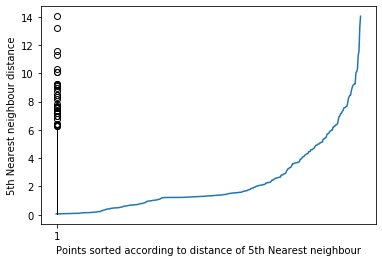

In [24]:
import matplotlib.pyplot as plt1
plt.xlabel('Points sorted according to distance of 5th Nearest neighbour')
plt.ylabel('5th Nearest neighbour distance')
plot = plt1.plot(length)

#fig_size = plt1.plot["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 10
#plt1.plot["figure.figsize"] = fig_size
boxpolt = plt1.boxplot(length)
epsi = np.percentile(length, 85)
epsi

In [25]:
pf=df;


def MyDBSCAN(D, eps, MinPts):
    
    """
     MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    """


    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.   
    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
            continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
         # If the number is below MinPts, this point is noise. 
         # A NOISE point may later 
         # be picked up by another cluster as a boundary point (this is the only
         # condition under which a cluster label can change--from NOISE to 
         # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
            C += 1
            growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    
    """
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    i = 0
    while i < len(NeighborPts):    
              
        Pn = NeighborPts[i]
       

        if labels[Pn] == -1:
            labels[Pn] = C
        
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts               
        
        # to the next point in NeighborPts
        i += 1        
    
    # finished growing cluster C


def regionQuery(D, P, eps):
    
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if np.linalg.norm(D[P] - D[Pn]) < eps:
            neighbors.append(Pn)
            
    return neighbors

400
400


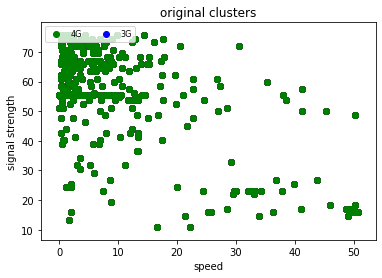

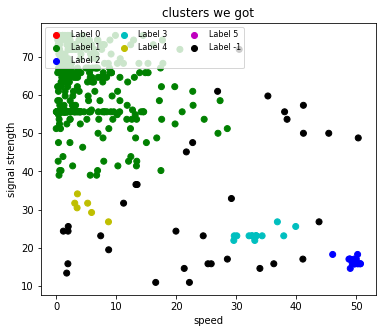

In [26]:
labels1 = MyDBSCAN(df1, eps=epsi, MinPts=minisup)
print(len(labels1))
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
r = plt.scatter(pf['speed'],pf['signal_strength'], marker ='o', color = colors[0]) 
  
g = plt.scatter(pf['speed'],pf['signal_strength'], marker ='o', color = colors[1]) 

b = plt.scatter(pf['speed'],pf['signal_strength'], marker ='o', color = colors[2]) 
c = plt.scatter(pf['speed'],pf['signal_strength'], marker ='o', color = colors[3]) 
y = plt.scatter(pf['speed'],pf['signal_strength'], marker ='o', color = colors[4]) 
m = plt.scatter(pf['speed'],pf['signal_strength'], marker ='o', color = colors[5]) 
k = plt.scatter(pf['speed'],pf['signal_strength'], marker ='o', color = colors[6]) 

df3=df2[df2.technology=="4G"]
df4=df2[df2.technology=="3G"]
df3 = df3[['speed','signal_strength']]
df4 = df4[['speed','signal_strength']]
plt.scatter(df3['speed'],df3['signal_strength'], marker ='o', color = 'g')
plt.scatter(df4['speed'],df4['signal_strength'], marker ='o', color = 'b')
plt.legend((g, b),('4G','3G'), 
          scatterpoints = 1, loc ='upper left',  ncol = 3, fontsize = 8)
plt.xlabel('speed')
plt.ylabel('signal strength')
plt.title('original clusters')

plt.figure(figsize =(6,5)) 
print(len(cvec))
plt.scatter(pf['speed'],pf['signal_strength'],c=cvec) 
plt.legend((r, g, b,c,y,m, k),('Label 0', 'Label 1', 'Label 2', 'Label 3 ','Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, loc ='upper left',  ncol = 3, fontsize = 8)
plt.xlabel('speed')
plt.ylabel('signal strength')
plt.title('clusters we got')
plt.show() 

In [27]:
from math import sqrt
import random as rd
from scipy.spatial import distance
def d_d(l, m):
    dist = list()
    for i in range(m):
        d = sqrt((df1[i][0] - l[0])**2 + (df1[i][1] - l[1])**2)
        dist.append(d)
    
    return(dist)

In [28]:
m=df5.shape[0]
n=df5.shape[1]
distortions = []
sum_d = list()
n_iter=100
C = 15
for K in range(C):
    
    K = K+1
    Centroids=np.array([]).reshape(2,0)
    
    for i in range(K):
        rand=rd.randint(0,m-1)
        Centroids=np.c_[Centroids,df5[rand]]
    
    for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(m,0)
            for k in range(K):
                l = Centroids[:,k]
                tempDist=d_d(l,m)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            L=np.argmin(EuclidianDistance,axis=1)+1
            
            Y={}
            for k in range(K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(m):
                Y[L[i]]=np.c_[Y[L[i]],df1[i]]
        
            for k in range(K):
                Y[k+1]=Y[k+1].T
            for k in range(K):
                Centroids[:,k]=np.mean(Y[k+1],axis=0)        

    Centroids = np.transpose(Centroids)
    
    sum_d = np.append(sum_d,np.sum(np.min(distance.cdist(df5, Centroids, 'euclidean'), axis=1)) / df5.shape[0])
    sum_d = np.nan_to_num(sum_d)
    
    distortions.append(sum_d[K-1])
    
for i in range(C):
    if i>2 and i<14:
        distortions[i-1] = (distortions[i-2] + distortions[i])/2

c:\users\pranav\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\pranav\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


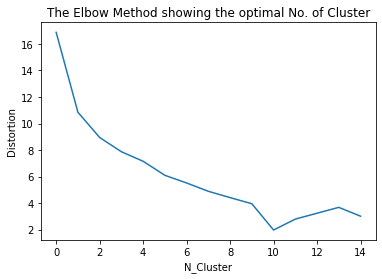

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(distortions)
plt.xlabel('N_Cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal No. of Cluster')
plt.show()